In [1]:
import numpy as np

https://stackoverflow.com/questions/53697218/generating-phone-numbers-using-specific-set-of-rules-in-python/53697489#53697489

In [2]:
A = np.zeros((10, 10))

In [3]:
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [4]:
A[0,4]=1
A[0,6]=1
A[1,6]=1
A[1,8]=1
A[2,7]=1
A[2,9]=1
A[3,4]=1
A[3,8]=1
A[4,0]=1
A[4,3]=1
A[4,9]=1
A[6,0]=1
A[6,1]=1
A[6,7]=1
A[7,2]=1
A[7,6]=1
A[8,1]=1
A[8,3]=1
A[9,2]=1
A[9,4]=1

In [5]:
print(A)

[[0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
B = np.zeros((10, 10))
B[0,4]=1
B[0,6]=1
B[1,6]=1
B[1,8]=1
B[2,7]=1
B[2,9]=1
B[3,4]=1
B[3,8]=1
B[4,9]=1
B[6,7]=1
B = np.maximum(B, B.T)

In [7]:
np.allclose(A, B)

True

In [8]:
np.allclose(A, A.T)

True

In [9]:
W = np.linalg.matrix_power(A, 9)

In [10]:
print(W)

[[  0.   0. 336.   0. 544.   0. 544.   0. 336.   0.]
 [  0.   0. 264.   0. 432.   0. 448.   0. 280.   0.]
 [336. 264.   0. 264.   0.   0.   0. 280.   0. 280.]
 [  0.   0. 264.   0. 448.   0. 432.   0. 280.   0.]
 [544. 432.   0. 448.   0.   0.   0. 432.   0. 448.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [544. 448.   0. 432.   0.   0.   0. 448.   0. 432.]
 [  0.   0. 280.   0. 432.   0. 448.   0. 264.   0.]
 [336. 280.   0. 280.   0.   0.   0. 264.   0. 264.]
 [  0.   0. 280.   0. 448.   0. 432.   0. 264.   0.]]


In [11]:
np.sum(W[2,:])

1424.0

In [12]:
W[2,5]

0.0

In [13]:
def phoneNumbersCount(n=10, i=2, A=A):
    return np.sum(np.linalg.matrix_power(A, n-1)[i,:])

In [14]:
phoneNumbersCount(10, 5)

0.0

In [15]:
np.where(A[2,:]>0)

(array([7, 9]),)

In [16]:
G = {
    0: [4, 6],
    1: [6, 8],
    2: [7, 9],
    3: [4, 8],
    4: [0, 3, 9],
    5: [],
    6: [0, 1, 7],
    7: [2, 6],
    8: [1, 3],
    9: [2, 4],
}

In [17]:
def AdjacencyMatrix(d):
    A = np.zeros([len(d)]*2)
    for i in d:
        for j in d[i]:
            A[i,j] = 1
    return A

In [18]:
C = AdjacencyMatrix(G)

In [19]:
np.allclose(A, C)

True

In [20]:
def phoneNumbers(n=10, i=2, G=G, number='', store=None):
    if store is None:
        store = list()
    number += str(i)
    if n > 1:
        for j in G[i]:
            phoneNumbers(n=n-1, i=j, G=G, number=number, store=store)
    else:
        store.append(number)
    return store

In [21]:
plist = phoneNumbers(n=10, i=2)

In [22]:
plist[-10:]

['2949494340',
 '2949494343',
 '2949494349',
 '2949494381',
 '2949494383',
 '2949494927',
 '2949494929',
 '2949494940',
 '2949494943',
 '2949494949']

In [23]:
len(plist)

1424

In [24]:
np.unique(plist).size

1424

In [25]:
len(set(plist))

1424

In [26]:
d = set([int(n[-1]) for n in plist])
d

{0, 1, 3, 7, 9}

In [27]:
set(range(10)) - d

{2, 4, 5, 6, 8}

In [28]:
import time
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
nr = 20
ns = 100
N = 15
nt = np.arange(N) + 1
t = np.full((N, 4), np.nan)

In [30]:
import pickle

In [31]:
with open("benchmark.pickle", 'rb') as f:
    t = pickle.load(f)

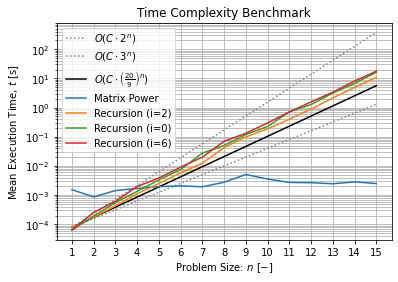

In [32]:
fig, axe = plt.subplots()
axe.semilogy(nt, t[0,1]*2**(nt-1), ':', color='gray')
axe.semilogy(nt, t[0,1]*3**(nt-1), ':', color='gray')
axe.semilogy(nt, t[0,1]*(20/9)**(nt-1), color='k')
axe.semilogy(nt, t)

axe.set_title("Time Complexity Benchmark")
axe.set_xlabel("Problem Size: $n$ $[-]$")
axe.set_ylabel("Mean Execution Time, $t$ $[\mathrm{s}]$")
axe.legend([r'$O(C\cdot2^n)$', r'$O(C\cdot3^n)$', r'$O(C\cdot\left(\frac{20}{9}\right)^n)$', 'Matrix Power', 'Recursion (i=2)', 'Recursion (i=0)', 'Recursion (i=6)'])
#axe.set_ylim([1e-6, 1e1])
axe.set_xticks(nt)
axe.grid(which='both')
fig.savefig("complexity.png", dpi=120)